# Branch And Bound

![Introduction picture](../../assets/images/bb_0.jpg "Board Infinity picture")

## Understanding The Algorithm

The Branch and Bound algorithm is a widely recognized algorithm design paradigm used primarily for solving combinatorial optimization problems. These problems often feature exponential time complexity and may necessitate exploring all possible permutations in the worst-case scenarios. Branch and Bound techniques offer a relatively quicker solution to these complex problems.

This algorithm operates on two fundamental principles. Firstly, it recursively splits the search space into smaller spaces—a process known as branching. In isolation, branching would simply be a brute-force enumeration of all possible solutions, testing each one. Secondly, the algorithm aims to minimize a function (often denoted as $f(x)$) within these smaller spaces. The combination of these two principles allows the algorithm to efficiently navigate the search space.

Branch and Bound algorithms are particularly effective in finding optimal solutions for a range of optimization problems, including combinatory, discrete, and general mathematical issues. They are even capable of providing optimal solutions to NP-Hard problems by thoroughly exploring the entire search space.

The algorithm is similar to backtracking in that it uses a state space tree. However, while backtracking is generally used for decision-making problems, Branch and Bound is employed for optimization and minimization problems. This distinction is crucial in understanding the application of the algorithm in various contexts.

The efficiency of the Branch and Bound algorithm largely depends on the bounding function's effectiveness and the strategy used for branching and pruning. A well-designed bounding function can significantly reduce the search space, making the algorithm more efficient, especially for complex and large-scale optimization problems.

The logic of the Branch and Bound algorithm can be broken down into several key steps. This algorithm is used for solving both maximization and minimization, by systematically considering candidate solutions within a defined search space. Here's an outline of its logical flow:

1. **Initialization**: The process begins by initializing a bounding function, which is used to estimate the upper or lower bound of the solution within a given subset of the search space. This function is crucial in guiding the search process.

2. **Branching**: The search space is recursively divided into smaller subspaces or subproblems. This process is referred to as "branching". Each branch represents a portion of the search space and contains a subset of the possible solutions.

3. **Bounding**: For each subspace created by branching, the bounding function is applied to estimate the best possible solution within that subspace. This step is crucial as it helps in eliminating subspaces that do not lead to an optimal solution, thereby reducing the search space.

4. **Pruning**: Subspaces or branches that are bound and found not to contain a feasible or optimal solution are "pruned" or eliminated from further consideration. This is an essential step to reduce computation time by avoiding unnecessary exploration of unpromising subspaces.

5. **Search and Exploration**: The algorithm explores the remaining subspaces, continuously branching and bounding. This process is typically carried out using a priority queue or similar data structure to manage the subspaces that need to be explored based on the bounds calculated.

6. **Solution Update**: Whenever a better solution is found within a subspace, it updates the current best solution. This updated solution then serves as a new benchmark for further bounding and pruning.

7. **Termination**: The process continues until there are no more subspaces left to explore or the bounding function indicates that no better solution can be found. The best solution found during this process is then returned as the optimal solution.

## Usage Examples

1. **Integer Programming**: In problems where variables are required to be integers, the Branch and Bound algorithm is used to find the optimal solution. Integer programming is a critical tool in various fields like operations research, economics, and management science, where discrete decisions need to be made.

2. **Nonlinear Programming**: This involves optimizing a nonlinear objective function with nonlinear constraints. Branch and Bound is employed here to efficiently navigate through the solution space to find the best possible solution.

3. **Travelling Salesman Problem (TSP)**: This classic problem, which involves finding the shortest possible route that visits a series of locations and returns to the origin, makes use of Branch and Bound to determine the most efficient path.

4. **Quadratic Assignment Problem (QAP)**: In this problem, Branch and Bound is used to assign a set of facilities to a set of locations in the most optimal way, considering the distance and flow between the facilities.

5. **Maximum Satisfiability Problem (MAX-SAT)**: This is a problem in computer science and mathematical logic where Branch and Bound is used to determine the arrangement of variables that maximizes the number of satisfied clauses in a Boolean formula.

6. **Job Assignment Problem**: This is a real-world scenario where jobs must be assigned to workers in a way that minimizes the total cost. The algorithm navigates through different combinations of job assignments to find the most cost-effective distribution.

## Strengths

1. **Reduced Time Complexity**: One of the primary advantages of the Branch and Bound algorithm is that it does not require the exploration of all nodes in a tree. This selective exploration significantly reduces the time complexity compared to other algorithms that might require a more exhaustive search.

2. **Optimal Solution**: When the problem size is manageable, and branching can be completed in a reasonable time, the Branch and Bound algorithm efficiently finds an optimal solution. This is particularly valuable in combinatorial optimization problems where finding the best solution is crucial.

3. **Pruning Efficiency**: The Branch and Bound algorithm includes a pruning technique that allows for the evaluation and elimination of certain paths based on their comparison with others. This process helps in disregarding paths that are not promising, thereby focusing the search on more viable solutions. This method is especially efficient in ruling out paths that are not worth exploring.

4. **Low Memory Usage and Best Partial Path Availability**: The algorithm is known for its low memory usage, which is a significant advantage when dealing with large datasets or complex problems. Additionally, it always maintains information about the best partial path explored so far, which can be useful in intermediate stages of problem-solving.

5. **Completeness and Optimality**: Branch and Bound is both complete and optimal, meaning it will search all possible solutions and find the best one. This ensures that no potential solution is overlooked, and the best possible outcome is achieved.

## Weaknesses

1. **Time-Consuming**: The algorithm can be quite time-consuming, particularly as the size of the problem increases. In the worst case, the number of nodes in the tree can become very large, leading to a significant increase in computation time.

2. **Difficulty in Parallelization**: Parallelizing the Branch and Bound algorithm is extremely challenging. This limitation can be a significant drawback in environments where parallel processing could be beneficial.

3. **Dependency on Efficient Estimation of Bounds**: The algorithm's effectiveness heavily relies on the efficient estimation of lower and upper bounds of regions or branches in the search space. If no bounds are available or if they are not accurately estimated, the algorithm can degenerate into performing an exhaustive search.

4. **Potential for Exponential Time Complexity**: In the worst-case scenario, the Branch and Bound algorithm can lead to exponential time complexities. This happens particularly when the algorithm has to explore a vast number of branches in the search tree.

## Python Demonstration

### Problem initialization

In [2]:
from assets.datasets.TSP import TravellingSalesman

tsp = TravellingSalesman(8, seed=None)

tsp.cities # jupyter print if nothing after

### ! Optionnal ! 
### Choose the starting city using next line
# tsp.set_starting_point('Sigil')

[('Metropolis', (67, 83)),
 ('Emerald City', (17, 92)),
 ('Neverwinter', (39, 59)),
 ('Riverwood', (69, 57)),
 ('Vault 111', (98, 61)),
 ('Pleasantville', (88, 4)),
 ('Kakariko Village', (22, 81)),
 ('Ironforge', (72, 19))]

### Solving with base algorithm

Minimum cost: 276.68970956974897


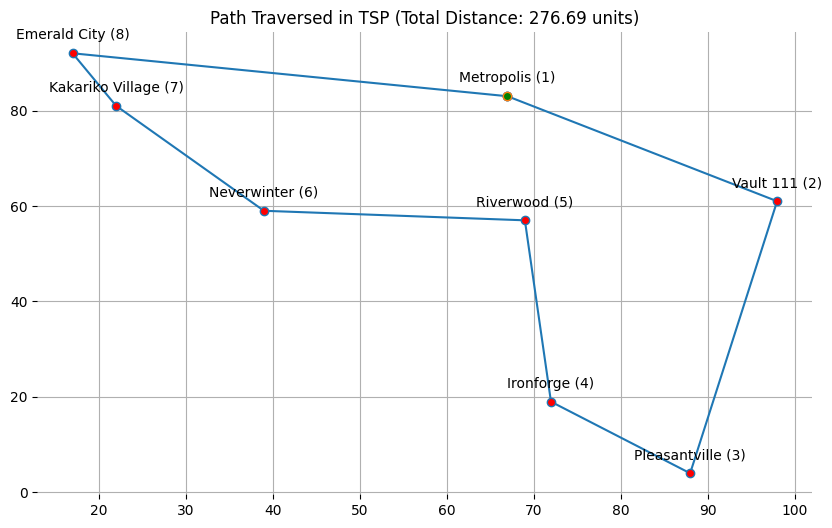

In [3]:
import sys
from queue import PriorityQueue

class Node:
    """
    Represents a node in a Branch and Bound decision tree.

    Attributes:
    - path (list): The path traversed until the current node.
    - reduced_matrix (list of lists): The reduced cost matrix at the current node.
    - cost (int): The total cost incurred in the path until the current node.
    - vertex (int): The current vertex in the decision tree.
    - level (int): The level of the node in the decision tree.
    """

    def __init__(self, path, reduced_matrix, cost, vertex, level):
        self.path = path
        self.reduced_matrix = reduced_matrix
        self.cost = cost
        self.vertex = vertex
        self.level = level

    def __lt__(self, other):
        """
        Define a comparison operation (less than) for PriorityQueue, based on the cost.

        Args:
        - other (Node): Another node to compare with.

        Returns:
        - bool: True if the cost of this node is less than the other node.
        """
        return self.cost < other.cost

def reduce_matrix(matrix, n):
    """
    Reduce a cost matrix and calculate the reduction cost.

    Args:
    - matrix (list of lists): The cost matrix to be reduced.
    - n (int): The dimension of the matrix.

    Returns:
    - int: The total reduction cost.
    """
    # Reduce each row and calculate row reduction cost
    row_reduce = [min(row) if min(row) != sys.maxsize else 0 for row in matrix]
    
    # Reduce each column and calculate column reduction cost
    col_reduce = [min(matrix[i][j] for i in range(n)) if min(matrix[i][j] for i in range(n)) != sys.maxsize else 0 for j in range(n)]

    # Reduce the matrix elements
    for i in range(n):
        for j in range(n):
            if matrix[i][j] != sys.maxsize and row_reduce[i] != sys.maxsize and col_reduce[j] != sys.maxsize:
                matrix[i][j] -= (row_reduce[i] + col_reduce[j])

    # Calculate total reduction cost
    cost = sum(row_reduce) + sum(col_reduce)
    return cost

def copy_matrix(matrix, n):
    """
    Create a deep copy of a matrix.

    Args:
    - matrix (list of lists): The matrix to be copied.
    - n (int): The dimension of the matrix.

    Returns:
    - list of lists: A deep copy of the provided matrix.
    """
    new_matrix = [row[:] for row in matrix]
    return new_matrix



def tsp_branch_and_bound(tsp):
    """
    Solve the Traveling Salesman Problem (TSP) using the Branch and Bound algorithm.

    Args:
    - tsp (TSP instance): An instance of the TSP problem, with cities and methods to get distances.

    Returns:
    - tuple: A tuple containing the best path found and its cost.
    """
    # Number of cities in the TSP instance.
    n = len(tsp.cities)

    # Create a distance matrix.
    distances = [
        [0 if i == j else tsp.get_distance(tsp.cities[i][0], tsp.cities[j][0]) for j in range(n)]
        for i in range(n)
    ]

    # Priority Queue to store live nodes of the search tree.
    pq = PriorityQueue()

    # Initial reduced matrix and its cost.
    initial_matrix = copy_matrix(distances, n)
    initial_cost = reduce_matrix(initial_matrix, n)

    # Create the first node (starting city) and add it to the queue.
    initial_node = Node(path=[0], reduced_matrix=initial_matrix, cost=initial_cost, vertex=0, level=1)
    pq.put(initial_node)

    # Initialize minimum cost to infinity.
    min_cost = sys.maxsize
    best_path = []

    # Explore nodes using Branch and Bound.
    while not pq.empty():
        current_node = pq.get()

        # Check if all cities are visited.
        if current_node.level == n:
            # Form a path back to the starting city and check the cost.
            current_path = current_node.path + [0]
            current_cost = current_node.cost
            if current_cost < min_cost:
                min_cost = current_cost
                best_path = current_path
            continue

        # Iterate through all vertices to find feasible vertices.
        for i in range(n):
            if distances[current_node.vertex][i] != sys.maxsize and i not in current_node.path:
                new_matrix = copy_matrix(current_node.reduced_matrix, n)

                # Set outgoing edges and the incoming edge of the selected vertex as infinity.
                for j in range(n):
                    new_matrix[current_node.vertex][j] = sys.maxsize
                    new_matrix[j][i] = sys.maxsize
                new_matrix[i][0] = sys.maxsize

                # Calculate the cost of the child node.
                cost = current_node.cost + current_node.reduced_matrix[current_node.vertex][i] + reduce_matrix(new_matrix, n)
                new_node = Node(path=current_node.path + [i], reduced_matrix=new_matrix, cost=cost, vertex=i, level=current_node.level + 1)
                pq.put(new_node)

    best_path.reverse()
    # Return the minimum cost and the best path found.
    return best_path, min_cost


# Usage
path, cost = tsp_branch_and_bound(tsp)
print("Minimum cost:", cost)
tsp.draw_path(path)

<div class="alert alert-block alert-warning">
 This branch and bound implementation is slow. The bellow PulP implementation shows much better performances.
</div>

### Solving using PulP library

Tour:  [(0, 1), (1, 6), (2, 3), (3, 7), (4, 0), (5, 4), (6, 2), (7, 5)]
Minimum cost: 276.6897095697489
Path: [0, 1, 6, 2, 3, 7, 5, 4, 0]


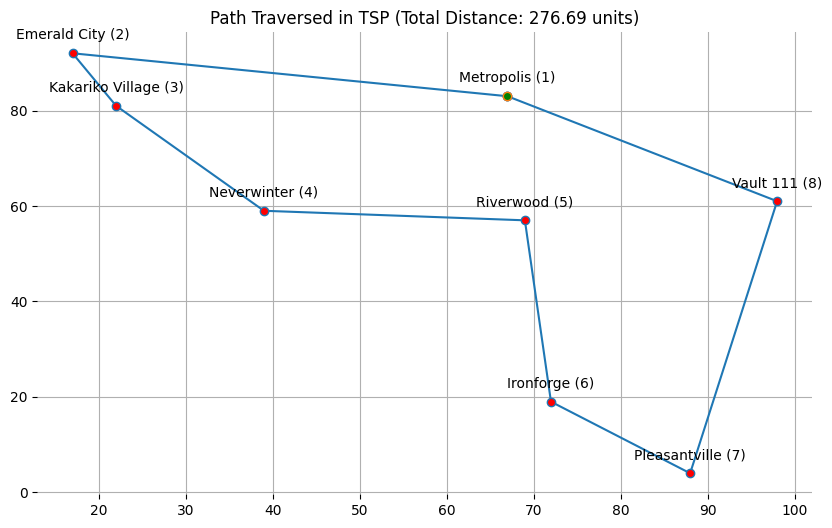

In [4]:
import pulp
from itertools import product

def solve_tsp_with_pulp(tsp):
    """
    Solve the Traveling Salesman Problem using linear programming with PuLP.

    Args:
    - tsp (TSP instance): An instance of the TSP problem, with cities and methods to get distances.

    Returns:
    - tuple: A tuple containing the tour as a list of (i, j) pairs and the total cost.
    """
    n = len(tsp.cities)
    # Create a distance matrix.
    distances = [
        [0 if i == j else tsp.get_distance(tsp.cities[i][0], tsp.cities[j][0]) for j in range(n)]
        for i in range(n)
    ]

    # Create the problem variable to contain the problem data.
    prob = pulp.LpProblem("TSP", pulp.LpMinimize)

    # A matrix of binary variables. x[i][j] is 1 if the path goes from city i to j.
    x = pulp.LpVariable.dicts("x", (range(n), range(n)), 0, 1, pulp.LpBinary)

    # Objective function - minimize the total distance.
    prob += pulp.lpSum(distances[i][j] * x[i][j] for i in range(n) for j in range(n))

    # Constraints: Exactly one outgoing and one incoming edge for each city.
    for i in range(n):
        prob += pulp.lpSum(x[i][j] for j in range(n) if i != j) == 1
        prob += pulp.lpSum(x[j][i] for j in range(n) if i != j) == 1

    # Subtour elimination constraints.
    u = pulp.LpVariable.dicts("u", range(n), 0, n-1, pulp.LpContinuous)
    for i, j in product(range(1, n), repeat=2):
        if i != j:
            prob += u[i] - u[j] + n * x[i][j] <= n-1

    # Solve the problem.
    prob.solve(pulp.apis.PULP_CBC_CMD(msg=False))

    # Extract the solution.
    tour = [(i, j) for i in range(n) for j in range(n) if pulp.value(x[i][j]) == 1]

    # Return the ordered tour and the total cost.
    return tour, pulp.value(prob.objective)

def reconstruct_path(tour, n):
    """
    Reconstruct the path from the tour.

    Args:
    - tour (list of tuples): The tour as a list of (i, j) pairs.
    - n (int): The number of cities.

    Returns:
    - list: The ordered path of the tour.
    """
    path = [0] # Start from the first city.
    while len(path) < n:
        for i, j in tour:
            if i == path[-1]:
                path.append(j)
                break
    path.append(0) # Return to the starting city.
    return path

# Usage
tour, cost = solve_tsp_with_pulp(tsp)
ordered_path = reconstruct_path(tour, len(tsp.cities))

print("Minimum cost:", cost)
print("Path:", ordered_path)

# Draw the path using TSP's draw_path method
tsp.draw_path(ordered_path)

### Knapsack problem with PulP

#### Problem initialization

In [5]:
from assets.datasets.knapsack import Knapsack

# Initialize Knapsack
knapsack = Knapsack(20, seed=42) # Gets random x items
items = knapsack.items
knapsack.show_state()

knapsack.weight_limit = 3.5
# knapsack.weight_limit:
# Specifies the maximum weight capacity of the knapsack. It is a constraint for the problem, determining which
# combinations of items can be considered valid solutions. Solutions that exceed this weight are penalized or
# deemed infeasible, ensuring the knapsack is not overloaded.

Total weight (taking everything): 7.650000000000001 kg 
Total value (taking everything): 1562 $


#### Execution

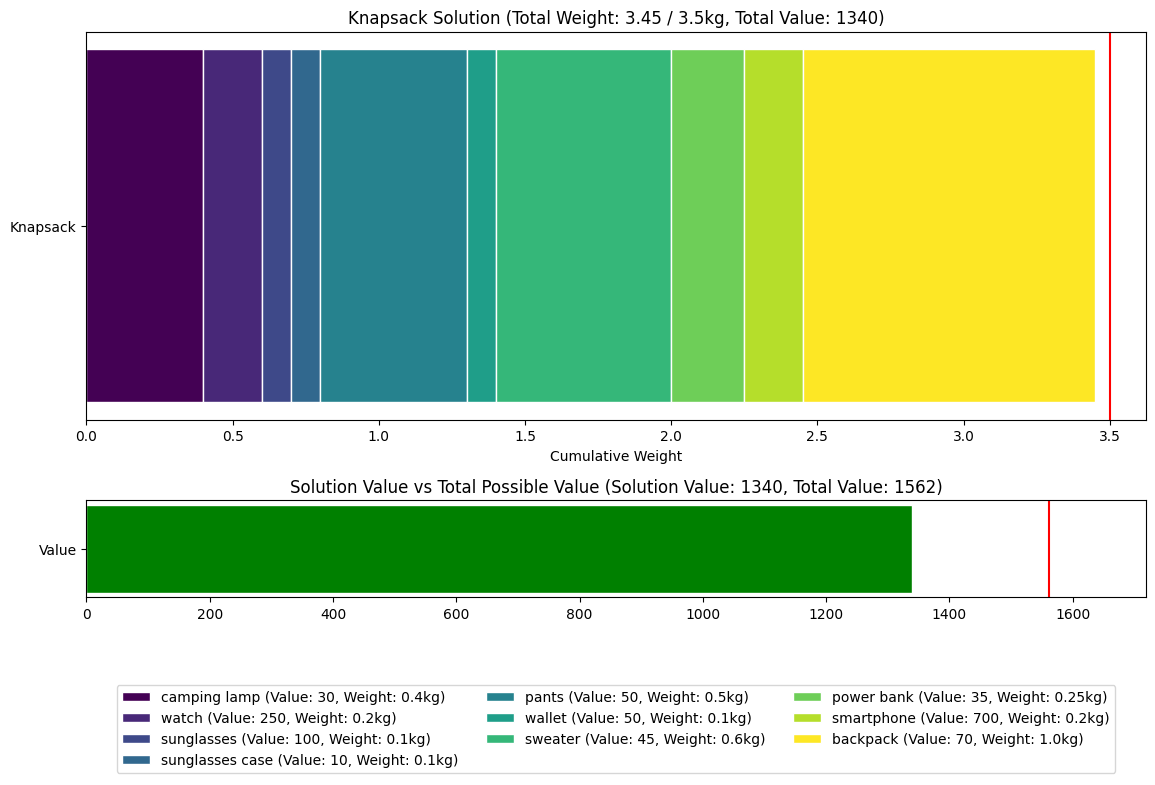

In [6]:
from pulp import LpProblem, LpVariable, LpInteger, LpMaximize, value, PULP_CBC_CMD

# Create a PuLP problem to model the Knapsack Problem
problem = LpProblem("Knapsack_Problem", LpMaximize)

# Create a dictionary of PuLP variables with item names as keys
# These variables are binary, indicating whether an item is included (1) or not (0).
x = LpVariable.dicts("item", [item['name'] for item in items], cat=LpInteger, lowBound=0, upBound=1)

# Objective Function: Maximize the total value of items included in the knapsack
problem += sum(item['value'] * x[item['name']] for item in items)

# Constraint: Total weight of items included should not exceed the knapsack capacity
problem += sum(item['weight'] * x[item['name']] for item in items) <= knapsack.weight_limit

# Solve the problem using PuLP's built-in solver
problem.solve(PULP_CBC_CMD(msg=False))  # msg=False disables solver logs

# Extract the solution: a list of items to include in the knapsack
knapsack.solution = [item for item in items if x[item['name']].varValue == 1]

# Plot the solution using a custom function (assuming this function is implemented)
# This function might visualize the cumulative value of items in the knapsack.
knapsack.plot_cumulative_knapsack_with_value()


End of demonstration

---
## Practical Optimization Tools

1. [**PuLP (Python)**](https://coin-or.github.io/pulp/): PuLP is a Python library for linear programming. It allows users to formulate their optimization problems in a very readable and intuitive way and can be used with different solvers, including those implementing the branch and bound method. PuLP is distinguished by its ease of use and its integration into the Python ecosystem, making it an ideal choice for projects requiring linear and integer optimization in Python.

2. [**SCIP (C)**](https://scipopt.org): SCIP is a problem-solving library for combinatorial optimization, which includes branch and bound algorithms. It is written in C and is particularly renowned for its flexibility and efficiency in solving integer optimization problems.

3. [**COIN-OR (C++)**](https://www.coin-or.org): The Computational Infrastructure for Operations Research (COIN-OR) is an initiative to develop open-source software for the analysis and solving of problems in operations research. Several of its projects, written in C++, implement the Branch and Bound algorithm.

4. [**MATLAB Optimization Toolbox (MATLAB)**](https://www.mathworks.com/products/matlab.html): MATLAB's Optimization Toolbox offers functions to solve linear, quadratic, nonlinear, and mixed-integer optimization problems. Although MATLAB is not open-source, it is widely used in academic and industrial environments.

5. [**GLPK (GNU Linear Programming Kit) (C)**](https://www.gnu.org/software/glpk/): GLPK provides a solver for linear programming (LP) and integer linear programming (ILP) problems. It is written in C and is a popular open-source option for linear and integer optimization.


## Sources

| Sources |
|---------|
| [Branch and Bound Algorithm - Geeksforgeeks](https://www.geeksforgeeks.org/branch-and-bound-algorithm/) |
| [Branch and bound - Wikipedia](https://en.wikipedia.org/wiki/Branch_and_bound) |
| [Branch and Bound Algorithm - Coding ninjas](https://www.codingninjas.com/studio/library/branch-and-bound-algorithm) |
| [Branch and Bound - Wallstreetmojo](https://www.wallstreetmojo.com/branch-and-bound/) |
| [Introduction to Branch and Bound – Data Structures and Algorithms Tutorial - Geeksforgeeks](https://www.geeksforgeeks.org/introduction-to-branch-and-bound-data-structures-and-algorithms-tutorial/) |
| [Branch and Bound Algorithm - Baeldung](https://www.baeldung.com/cs/branch-and-bound) |
| [Branch and Bound Technique - Opengenus](https://iq.opengenus.org/branch-and-bound/) |
| [ALGORITHMS BRANCH AND BOUND - Stanford](https://cs.stanford.edu/people/eroberts/courses/soco/projects/2003-04/intelligent-search/branch.html) |
| [Branch and Bound - seas.gwu.edu](https://www2.seas.gwu.edu/~ayoussef/cs6212/branchandbound.html) |
| [Intro picture - Boardinfinity](https://www.boardinfinity.com/blog/branch-and-bound-algorithm/) |
